# Part1: TTS Inference Demo using NeMo

This notebook aims to synthesise speech samples using the checkpoints including;
*   pretrained models (NGC)
*   trained models (local)



This notebook is modified from:
1.   https://github.com/NVIDIA/NeMo/tree/main/tutorials/tts/
2.   https://catalog.ngc.nvidia.com/orgs/nvidia/collections/nemo_tts



# Setting up the Environment


1.   Save a copy in Drive
2.   Use GPU runtime
3.   Install the dependencies



In [ ]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-bdc5c9a7-e435-8935-b613-6521ffc37fde)


## Installation

In [ ]:
!pip install Cython
!pip install nemo_toolkit['all']

  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)


# Checkpoint NeMo model
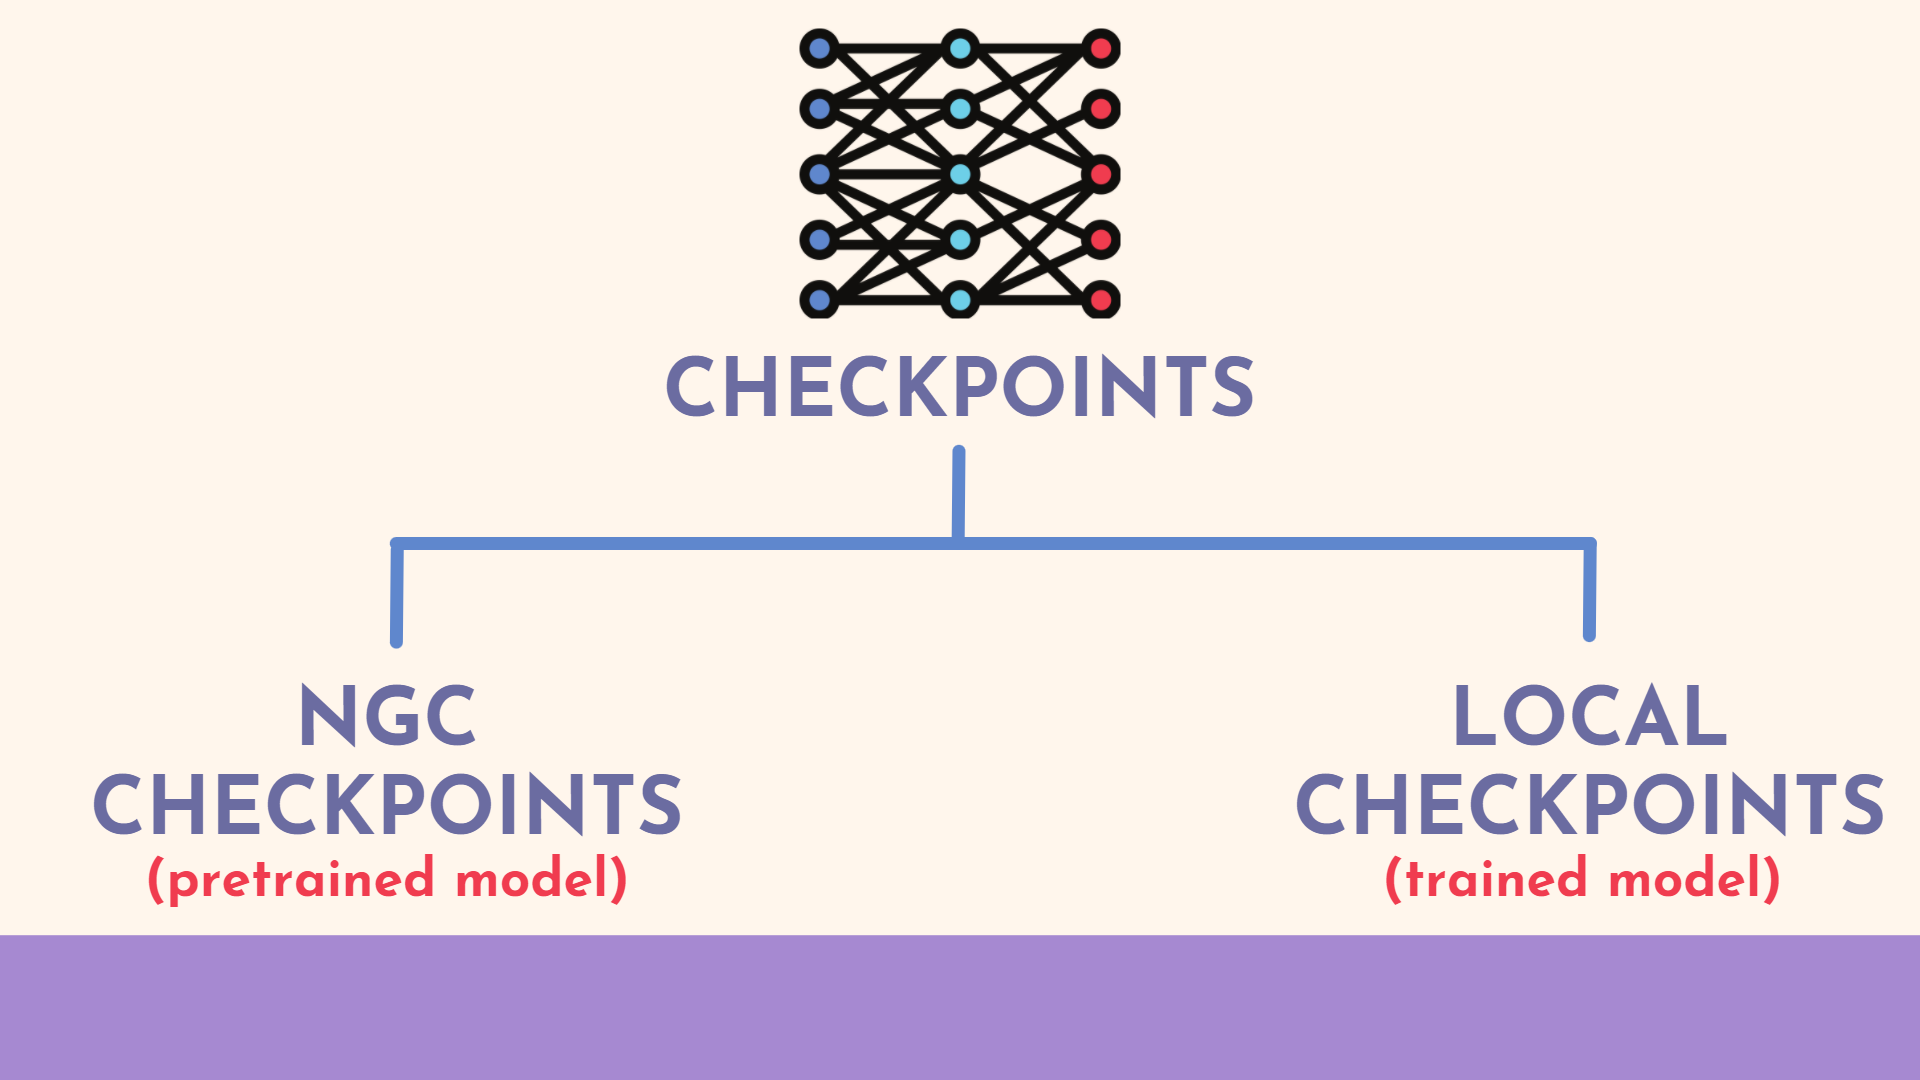

# Load pretrained models (NGC)

This section shows how to load the pretrained model provided by NeMo with two functions;
1.   list_available_models() e.g. *base_class.list_available_models()*
2.   from_pretrained() e.g. *base_class.from_pretrained(model_name)*

# Generate speech from pretrained model

## Download and Load the SpectrogramGenerator model


In [ ]:
from nemo.collections.tts.models.base import SpectrogramGenerator
spec_name = "tts_en_tacotron2"
spec_generator=SpectrogramGenerator.from_pretrained(spec_name).eval().cuda()


[NeMo I 2022-02-21 20:47:55 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.6.2/tts_en_tacotron2/74d819609f47744063679b44e93a47f1/tts_en_tacotron2.nemo.
[NeMo I 2022-02-21 20:47:55 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.6.2/tts_en_tacotron2/74d819609f47744063679b44e93a47f1/tts_en_tacotron2.nemo
[NeMo I 2022-02-21 20:47:55 common:728] Instantiating model from pre-trained checkpoint


[NeMo W 2022-02-21 20:47:57 modelPT:136] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.asr.data.audio_to_text.AudioToCharDataset
      manifest_filepath: /raid/LJSpeech/nvidia_ljspeech_train.json
      max_duration: null
      min_duration: 0.1
      trim: false
      int_values: false
      load_audio: true
      normalize: true
      sample_rate: 22050
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 48
      num_workers: 4
    
[NeMo W 2022-02-21 20:47:57 modelPT:143] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.asr.data.audio_to_

[NeMo I 2022-02-21 20:47:57 features:264] PADDING: 16
[NeMo I 2022-02-21 20:47:57 features:281] STFT using torch
[NeMo I 2022-02-21 20:47:57 save_restore_connector:154] Model Tacotron2Model was successfully restored from /root/.cache/torch/NeMo/NeMo_1.6.2/tts_en_tacotron2/74d819609f47744063679b44e93a47f1/tts_en_tacotron2.nemo.


## Download and Load the Vocoder model


In [ ]:
from nemo.collections.tts.models.base import Vocoder
vocoder_name="tts_hifigan"
vocoder = Vocoder.from_pretrained(vocoder_name).eval().cuda()

[NeMo I 2022-02-21 20:47:57 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.6.2/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo.
[NeMo I 2022-02-21 20:47:57 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.6.2/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo
[NeMo I 2022-02-21 20:47:57 common:728] Instantiating model from pre-trained checkpoint


[NeMo W 2022-02-21 20:48:00 modelPT:136] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/train_finetune.txt
      min_duration: 0.75
      n_segments: 8192
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 64
      num_workers: 4
    
[NeMo W 2022-02-21 20:48:00 modelPT:143] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/val_finetune.txt
      min_duration: 3
      n_segments: 66150


[NeMo I 2022-02-21 20:48:01 features:264] PADDING: 0
[NeMo I 2022-02-21 20:48:01 features:281] STFT using torch


[NeMo W 2022-02-21 20:48:01 features:242] Using torch_stft is deprecated and will be removed in 1.1.0. Please set stft_conv and stft_exact_pad to False for FilterbankFeatures and AudioToMelSpectrogramPreprocessor. Please set exact_pad to True as needed.


[NeMo I 2022-02-21 20:48:01 features:264] PADDING: 0
[NeMo I 2022-02-21 20:48:01 features:281] STFT using torch
[NeMo I 2022-02-21 20:48:02 save_restore_connector:154] Model HifiGanModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.6.2/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo.


## Input text


## Character to tokenised_id


In [ ]:
# example English labels: [' ', '!', '"', "'", '(', ')', ',', '-', '.', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H',
#        'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']',
#        'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
#        'u', 'v', 'w', 'x', 'y', 'z']

# text to number(vector), start to end
token_id = spec_generator.parse("abcdez !\"(),abcdez")
print(token_id)

tensor([[66, 40, 41, 42, 43, 44, 65,  0,  1,  2,  4,  5,  6, 40, 41, 42, 43, 44,
         65, 67]], device='cuda:0')


In [ ]:
text_input = input("Input anything you want to say: ")

Input anything you want to say: test test


In [ ]:
token_id = spec_generator.parse(text_input)
print(token_id)

tensor([[66, 59, 44, 58, 59,  0, 59, 44, 58, 59, 67]], device='cuda:0')


## Tokenised_id to mel-spectrogram

In [ ]:
# token id to mel-spectrogram
spectrogram = spec_generator.generate_spectrogram(tokens=token_id)

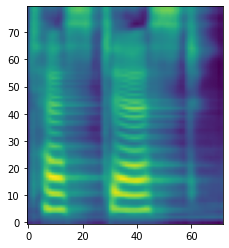

In [ ]:
# mel-spectrogram to speech
%matplotlib inline

import torch
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

def show_spectrogram(spectrogram):
  with torch.no_grad():
    if spectrogram is not None:
      if isinstance(spectrogram, torch.Tensor):
          spectrogram = spectrogram.to('cpu').numpy()
      if len(spectrogram.shape) == 3:
          spectrogram = spectrogram[0]

      imshow(spectrogram, origin="lower")
      plt.show()

show_spectrogram(spectrogram)


## Mel-spectrogram to audio

In [ ]:
audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)

In [ ]:
%matplotlib inline
import IPython.display as ipd

def show_audio(audio):
  with torch.no_grad():
    if isinstance(audio, torch.Tensor):
      audio = audio.to('cpu').numpy()
      #print("show audio")
      ipd.display(ipd.Audio(audio, rate=22050))


In [ ]:
show_audio(audio)

In [ ]:
if vocoder_name == "tts_hifigan":
  audio_denoise = vocoder._bias_denoise(audio, spectrogram).squeeze(1)
  show_audio(audio)

## Other pre-trained models
can be found in https://catalog.ngc.nvidia.com/orgs/nvidia/collections/nemo_tts

In [ ]:
spec_generator1=SpectrogramGenerator.from_pretrained("tts_en_glowtts").eval().cuda()
spec_generator2=SpectrogramGenerator.from_pretrained("tts_en_tacotron2").eval().cuda()
spec_generator3=SpectrogramGenerator.from_pretrained("tts_en_fastspeech2").eval().cuda()
spec_generator4=SpectrogramGenerator.from_pretrained("tts_en_fastpitch").eval().cuda()
spec_generator5=SpectrogramGenerator.from_pretrained("tts_en_talknet").eval().cuda()


[NeMo I 2022-02-21 20:49:18 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.6.2/tts_en_glowtts/4fa98b07dae75e8792ec14eb17fd8859/tts_en_glowtts.nemo.
[NeMo I 2022-02-21 20:49:18 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.6.2/tts_en_glowtts/4fa98b07dae75e8792ec14eb17fd8859/tts_en_glowtts.nemo
[NeMo I 2022-02-21 20:49:18 common:728] Instantiating model from pre-trained checkpoint


[NeMo W 2022-02-21 20:49:19 modelPT:149] Please call the ModelPT.setup_test_data() or ModelPT.setup_multiple_test_data() method and provide a valid configuration file to setup the test data loader(s).
    Test config : 
    manifest_filepath: null
    sample_rate: 22050
    batch_size: 1
    max_duration: null
    min_duration: 0.1
    trim: false
    shuffle: false
    num_workers: 8
    cmu_dict_path: null
    
[NeMo W 2022-02-21 20:49:19 features:242] Using torch_stft is deprecated and will be removed in 1.1.0. Please set stft_conv and stft_exact_pad to False for FilterbankFeatures and AudioToMelSpectrogramPreprocessor. Please set exact_pad to True as needed.


[NeMo I 2022-02-21 20:49:19 features:264] PADDING: 16
[NeMo I 2022-02-21 20:49:19 features:274] STFT using conv
[NeMo I 2022-02-21 20:49:20 save_restore_connector:154] Model GlowTTSModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.6.2/tts_en_glowtts/4fa98b07dae75e8792ec14eb17fd8859/tts_en_glowtts.nemo.
[NeMo I 2022-02-21 20:49:20 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.6.2/tts_en_tacotron2/74d819609f47744063679b44e93a47f1/tts_en_tacotron2.nemo.
[NeMo I 2022-02-21 20:49:20 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.6.2/tts_en_tacotron2/74d819609f47744063679b44e93a47f1/tts_en_tacotron2.nemo
[NeMo I 2022-02-21 20:49:20 common:728] Instantiating model from pre-trained checkpoint


[NeMo W 2022-02-21 20:49:21 modelPT:136] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.asr.data.audio_to_text.AudioToCharDataset
      manifest_filepath: /raid/LJSpeech/nvidia_ljspeech_train.json
      max_duration: null
      min_duration: 0.1
      trim: false
      int_values: false
      load_audio: true
      normalize: true
      sample_rate: 22050
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 48
      num_workers: 4
    
[NeMo W 2022-02-21 20:49:21 modelPT:143] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.asr.data.audio_to_

[NeMo I 2022-02-21 20:49:21 features:264] PADDING: 16
[NeMo I 2022-02-21 20:49:21 features:281] STFT using torch
[NeMo I 2022-02-21 20:49:21 save_restore_connector:154] Model Tacotron2Model was successfully restored from /root/.cache/torch/NeMo/NeMo_1.6.2/tts_en_tacotron2/74d819609f47744063679b44e93a47f1/tts_en_tacotron2.nemo.
[NeMo I 2022-02-21 20:49:21 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.6.2/tts_en_fastspeech2/668156443df6d44324895b26d6b02660/tts_en_fastspeech2.nemo.
[NeMo I 2022-02-21 20:49:21 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.6.2/tts_en_fastspeech2/668156443df6d44324895b26d6b02660/tts_en_fastspeech2.nemo
[NeMo I 2022-02-21 20:49:21 common:728] Instantiating model from pre-trained checkpoint


[NeMo W 2022-02-21 20:49:22 modelPT:136] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.FastSpeech2Dataset
      manifest_filepath: /data2/test_LJSpeech-1.1/ljspeech_train.json
      mappings_filepath: /data2/test_LJSpeech-1.1/mappings.json
      sample_rate: 22050
      max_duration: null
      min_duration: 0.1
      ignore_file: /data2/test_LJSpeech-1.1/wavs_to_ignore.pkl
      trim: false
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 64
      num_workers: 4
    
[NeMo W 2022-02-21 20:49:22 modelPT:143] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    da

[NeMo I 2022-02-21 20:49:22 features:264] PADDING: 16
[NeMo I 2022-02-21 20:49:22 features:281] STFT using torch
[NeMo I 2022-02-21 20:49:24 save_restore_connector:154] Model FastSpeech2Model was successfully restored from /root/.cache/torch/NeMo/NeMo_1.6.2/tts_en_fastspeech2/668156443df6d44324895b26d6b02660/tts_en_fastspeech2.nemo.
[NeMo I 2022-02-21 20:49:24 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.6.2/tts_en_fastpitch_align/b50e16c5d695b00855ae53d6ba4e4f7f/tts_en_fastpitch_align.nemo.
[NeMo I 2022-02-21 20:49:24 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.6.2/tts_en_fastpitch_align/b50e16c5d695b00855ae53d6ba4e4f7f/tts_en_fastpitch_align.nemo
[NeMo I 2022-02-21 20:49:24 common:728] Instantiating model from pre-trained checkpoint


[NeMo E 2022-02-21 20:49:25 vocabs:324] Torch distributed needs to be initialized before you initialized <nemo.collections.common.data.vocabs.Phonemes object at 0x7f4337a8bb10>. This class is prone to data access race conditions. Now downloading corpora from global rank 0. If other ranks pass this before rank 0, errors might result.
[NeMo W 2022-02-21 20:49:27 modelPT:136] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.asr.data.audio_to_text.AudioToCharWithPriorAndPitchDataset
      manifest_filepath: /raid/LJSpeech/nvidia_ljspeech_train.json
      max_duration: null
      min_duration: 0.1
      int_values: false
      normalize: true
      sample_rate: 22050
      trim: false
      sup_data_path: /raid/LJSpeech/prior
      n_window_stride: 256
      n_window_size: 1024
      pitch_fmin: 80
      pit

[NeMo I 2022-02-21 20:49:27 features:264] PADDING: 1
[NeMo I 2022-02-21 20:49:27 features:281] STFT using torch
[NeMo I 2022-02-21 20:49:28 save_restore_connector:154] Model FastPitchModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.6.2/tts_en_fastpitch_align/b50e16c5d695b00855ae53d6ba4e4f7f/tts_en_fastpitch_align.nemo.
[NeMo I 2022-02-21 20:49:28 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.6.2/talknet_spect/7d3344bcbd8289289b93a9f0425d2035/talknet_spect.nemo.
[NeMo I 2022-02-21 20:49:28 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.6.2/talknet_spect/7d3344bcbd8289289b93a9f0425d2035/talknet_spect.nemo
[NeMo I 2022-02-21 20:49:28 common:728] Instantiating model from pre-trained checkpoint


[NeMo W 2022-02-21 20:49:28 model_utils:413] Skipped conversion for config/subconfig:
    {'_target_': 'nemo.collections.asr.data.audio_to_text.AudioToCharWithDursF0Dataset', 'manifest_filepath': '???', 'max_duration': None, 'min_duration': 0.1, 'int_values': False, 'load_audio': True, 'normalize': False, 'sample_rate': 22050, 'trim': False, 'durs_file': '???', 'f0_file': '???', 'blanking': True, 'vocab': {'notation': 'phonemes', 'punct': True, 'spaces': True, 'stresses': False, 'add_blank_at': 'last'}}
     Reason: Missing mandatory value: train_ds.dataset.manifest_filepath
        full_key: train_ds.dataset.manifest_filepath
        object_type=dict.
[NeMo W 2022-02-21 20:49:28 model_utils:413] Skipped conversion for config/subconfig:
    {'_target_': 'nemo.collections.asr.data.audio_to_text.AudioToCharWithDursF0Dataset', 'manifest_filepath': '???', 'max_duration': None, 'min_duration': 0.1, 'int_values': False, 'load_audio': True, 'normalize': False, 'sample_rate': 22050, 'trim': Fa

[NeMo I 2022-02-21 20:49:29 features:264] PADDING: 1
[NeMo I 2022-02-21 20:49:29 features:281] STFT using torch
[NeMo I 2022-02-21 20:49:29 save_restore_connector:154] Model TalkNetSpectModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.6.2/talknet_spect/7d3344bcbd8289289b93a9f0425d2035/talknet_spect.nemo.


In [ ]:
vocoder1 = Vocoder.from_pretrained("tts_hifigan").eval().cuda()
vocoder2 = Vocoder.from_pretrained("tts_melgan").eval().cuda()
vocoder3 = Vocoder.from_pretrained("tts_squeezewave").eval().cuda()
vocoder4 = Vocoder.from_pretrained("tts_uniglow").eval().cuda()
vocoder5 = Vocoder.from_pretrained("tts_waveglow_268m").eval().cuda()
vocoder6 = Vocoder.from_pretrained("tts_waveglow_88m").eval().cuda()


[NeMo I 2022-02-21 20:49:29 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.6.2/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo.
[NeMo I 2022-02-21 20:49:29 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.6.2/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo
[NeMo I 2022-02-21 20:49:29 common:728] Instantiating model from pre-trained checkpoint


[NeMo W 2022-02-21 20:49:32 modelPT:136] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/train_finetune.txt
      min_duration: 0.75
      n_segments: 8192
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 64
      num_workers: 4
    
[NeMo W 2022-02-21 20:49:32 modelPT:143] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/val_finetune.txt
      min_duration: 3
      n_segments: 66150


[NeMo I 2022-02-21 20:49:32 features:264] PADDING: 0
[NeMo I 2022-02-21 20:49:32 features:281] STFT using torch


[NeMo W 2022-02-21 20:49:32 features:242] Using torch_stft is deprecated and will be removed in 1.1.0. Please set stft_conv and stft_exact_pad to False for FilterbankFeatures and AudioToMelSpectrogramPreprocessor. Please set exact_pad to True as needed.


[NeMo I 2022-02-21 20:49:32 features:264] PADDING: 0
[NeMo I 2022-02-21 20:49:32 features:281] STFT using torch
[NeMo I 2022-02-21 20:49:34 save_restore_connector:154] Model HifiGanModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.6.2/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo.
[NeMo I 2022-02-21 20:49:34 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.6.2/tts_melgan/38f156f172595e60f02169891e303590/tts_melgan.nemo.
[NeMo I 2022-02-21 20:49:34 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.6.2/tts_melgan/38f156f172595e60f02169891e303590/tts_melgan.nemo
[NeMo I 2022-02-21 20:49:34 common:728] Instantiating model from pre-trained checkpoint


[NeMo W 2022-02-21 20:49:35 modelPT:136] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.AudioDataset
      manifest_filepath: /raid/LJSpeech/nvidia_ljspeech_train.json
      max_duration: null
      min_duration: 0.75
      n_segments: 16384
      trim: false
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 64
      num_workers: 4
    
[NeMo W 2022-02-21 20:49:35 modelPT:143] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.AudioDataset
      manifest_filepath: /raid/LJSpeech/nvidia_ljspeech_val.jso

[NeMo I 2022-02-21 20:49:35 features:264] PADDING: 0
[NeMo I 2022-02-21 20:49:35 features:281] STFT using torch
[NeMo I 2022-02-21 20:49:35 features:283] STFT using exact pad
[NeMo I 2022-02-21 20:49:35 save_restore_connector:154] Model MelGanModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.6.2/tts_melgan/38f156f172595e60f02169891e303590/tts_melgan.nemo.
[NeMo I 2022-02-21 20:49:35 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.6.2/tts_squeezewave/d48f5835ac007ddb0c183bdbbbdace28/tts_squeezewave.nemo.
[NeMo I 2022-02-21 20:49:35 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.6.2/tts_squeezewave/d48f5835ac007ddb0c183bdbbbdace28/tts_squeezewave.nemo
[NeMo I 2022-02-21 20:49:35 common:728] Instantiating model from pre-trained checkpoint


[NeMo W 2022-02-21 20:49:37 features:242] Using torch_stft is deprecated and will be removed in 1.1.0. Please set stft_conv and stft_exact_pad to False for FilterbankFeatures and AudioToMelSpectrogramPreprocessor. Please set exact_pad to True as needed.


[NeMo I 2022-02-21 20:49:37 features:264] PADDING: 1
[NeMo I 2022-02-21 20:49:37 features:274] STFT using conv
[NeMo I 2022-02-21 20:49:37 features:276] STFT using exact pad
[NeMo I 2022-02-21 20:49:40 save_restore_connector:154] Model SqueezeWaveModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.6.2/tts_squeezewave/d48f5835ac007ddb0c183bdbbbdace28/tts_squeezewave.nemo.
[NeMo I 2022-02-21 20:49:40 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.6.2/tts_uniglow/6d1602a9610471099e8fcc2d29e5ae9a/tts_uniglow.nemo.
[NeMo I 2022-02-21 20:49:40 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.6.2/tts_uniglow/6d1602a9610471099e8fcc2d29e5ae9a/tts_uniglow.nemo
[NeMo I 2022-02-21 20:49:40 common:728] Instantiating model from pre-trained checkpoint


[NeMo W 2022-02-21 20:49:40 modelPT:136] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.AudioDataset
      manifest_filepath: /home/tlv/data/LJSpeech-1.1/train.txt
      max_duration: null
      min_duration: 0.1
      n_segments: 16384
      trim: false
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 12
      num_workers: 4
    
[NeMo W 2022-02-21 20:49:40 modelPT:143] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.AudioDataset
      manifest_filepath: /home/tlv/data/LJSpeech-1.1/val.txt
      m

[NeMo I 2022-02-21 20:49:40 features:264] PADDING: 0
[NeMo I 2022-02-21 20:49:40 features:274] STFT using conv
[NeMo I 2022-02-21 20:49:41 save_restore_connector:154] Model UniGlowModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.6.2/tts_uniglow/6d1602a9610471099e8fcc2d29e5ae9a/tts_uniglow.nemo.
[NeMo I 2022-02-21 20:49:41 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.6.2/tts_waveglow_268m/4e349bb935476653130e3d61d859ca82/tts_waveglow_268m.nemo.
[NeMo I 2022-02-21 20:49:41 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.6.2/tts_waveglow_268m/4e349bb935476653130e3d61d859ca82/tts_waveglow_268m.nemo
[NeMo I 2022-02-21 20:49:41 common:728] Instantiating model from pre-trained checkpoint


[NeMo W 2022-02-21 20:49:52 features:242] Using torch_stft is deprecated and will be removed in 1.1.0. Please set stft_conv and stft_exact_pad to False for FilterbankFeatures and AudioToMelSpectrogramPreprocessor. Please set exact_pad to True as needed.


[NeMo I 2022-02-21 20:49:52 features:264] PADDING: 16
[NeMo I 2022-02-21 20:49:52 features:274] STFT using conv
[NeMo I 2022-02-21 20:50:01 save_restore_connector:154] Model WaveGlowModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.6.2/tts_waveglow_268m/4e349bb935476653130e3d61d859ca82/tts_waveglow_268m.nemo.
[NeMo I 2022-02-21 20:50:01 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.6.2/tts_waveglow/be8c69c04450b3da0ce5a38a8ef4014f/tts_waveglow.nemo.
[NeMo I 2022-02-21 20:50:01 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.6.2/tts_waveglow/be8c69c04450b3da0ce5a38a8ef4014f/tts_waveglow.nemo
[NeMo I 2022-02-21 20:50:01 common:728] Instantiating model from pre-trained checkpoint


[NeMo W 2022-02-21 20:50:05 modelPT:136] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.AudioDataset
      manifest_filepath: /raid/LJSpeech/nvidia_ljspeech_train.json
      max_duration: null
      min_duration: 0.1
      n_segments: 16000
      trim: false
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 12
      num_workers: 4
    
[NeMo W 2022-02-21 20:50:05 modelPT:143] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.AudioDataset
      manifest_filepath: /raid/LJSpeech/nvidia_ljspeech_val.json

[NeMo I 2022-02-21 20:50:05 features:264] PADDING: 16
[NeMo I 2022-02-21 20:50:05 features:281] STFT using torch
[NeMo I 2022-02-21 20:50:07 save_restore_connector:154] Model WaveGlowModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.6.2/tts_waveglow/be8c69c04450b3da0ce5a38a8ef4014f/tts_waveglow.nemo.


## Text2Wav



In [ ]:
def text2wav(text_input,spec_generator,vocoder,sSpec_name,sVocoder_name):
  token_id = spec_generator.parse(text_input)
  spectrogram = spec_generator.generate_spectrogram(tokens=token_id)
  audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)
  print(("%s:%s")%(sSpec_name,sVocoder_name))
  show_audio(audio)

def text2spectrogram(text_input,spec_generator):
  token_id = spec_generator.parse(text_input)
  spectrogram = spec_generator.generate_spectrogram(tokens=token_id)
  return spectrogram

def spectrogram2wav(spectrogram,vocoder,sSpec_name,sVocoder_name):
  audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)
  print(("%s:%s")%(sSpec_name,sVocoder_name))
  show_audio(audio)

In [ ]:
text_input="hello, this is a tts inference demo test for today workshop"

text2wav(text_input,spec_generator1,vocoder,"glowtts","hifigan")
text2wav(text_input,spec_generator2,vocoder,"tacotron2","hifigan")

[NeMo W 2022-02-21 20:50:07 nemo_logging:349] /usr/local/lib/python3.7/dist-packages/nemo/collections/tts/modules/glow_tts.py:428: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
      spect_lengths = (spect_lengths // self.decoder.n_sqz) * self.decoder.n_sqz
    


glowtts:hifigan


tacotron2:hifigan


In [ ]:
spectrogram = spec_generator.generate_spectrogram(tokens=token_id)

text_input="hello, this is a tts inference demo test for today workshop"
spectrogram=text2spectrogram(text_input,spec_generator2)

spectrogram2wav(spectrogram,vocoder1,"tacotron2","hifigan")
spectrogram2wav(spectrogram,vocoder2,"tacotron2","melgan")
spectrogram2wav(spectrogram,vocoder6,"tacotron2","tts_waveglow_88m")


tacotron2:hifigan


tacotron2:melgan


tacotron2:tts_waveglow_88m


# Generate speech from trained models (local)

This section shows how to load the trained model into local directory. (https://catalog.ngc.nvidia.com/orgs/nvidia/collections/nemo_tts)

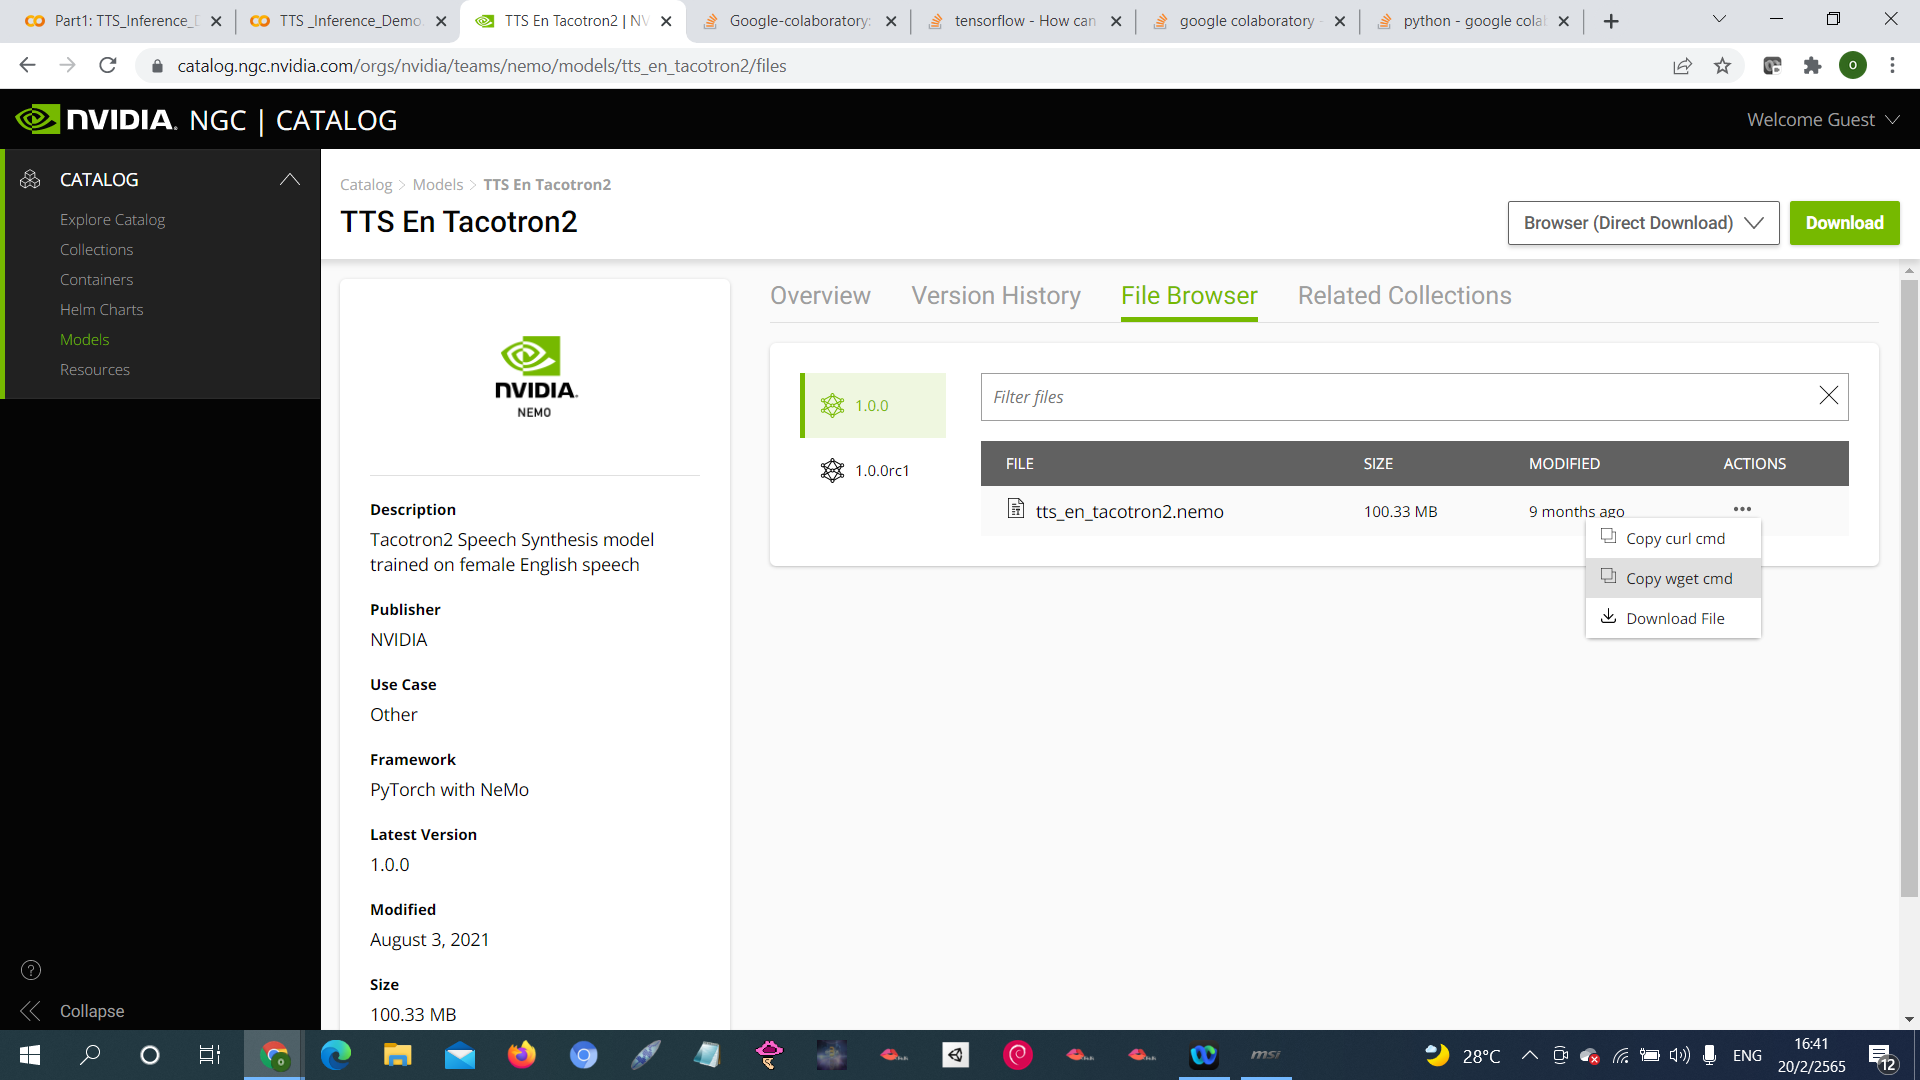

In [ ]:
# download trained model to local
import wget
location_model="https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_tacotron2/versions/1.0.0/files/tts_en_tacotron2.nemo"
!wget {location_model}

--2022-02-21 20:50:10--  https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_tacotron2/versions/1.0.0/files/tts_en_tacotron2.nemo
Resolving api.ngc.nvidia.com (api.ngc.nvidia.com)... 52.26.61.125, 44.241.81.69
Connecting to api.ngc.nvidia.com (api.ngc.nvidia.com)|52.26.61.125|:443... connected.
HTTP request sent, awaiting response... 302 
Location: https://prod-model-registry-ngc-bucket.s3.us-west-2.amazonaws.com/org/nvidia/team/nemo/models/tts_en_tacotron2/versions/1.0.0/files/tts_en_tacotron2.nemo?response-content-disposition=attachment%3B%20filename%3D%22tts_en_tacotron2.nemo%22&response-content-type=application%2Foctet-stream&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEPP%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCXVzLXdlc3QtMiJHMEUCIQCFQCFkBmgXPmuu9oKCqtn30uZcd7agd8JPYMdXmWyCPAIgVSR6CDds4VtyqpYe1C5%2FlWMFgWdmWVTdKHAsStmQlZwq%2BgMITBADGgw3ODkzNjMxMzUwMjciDDR5VsGKdIVhWHDvNirXA63JrGsw8qtaoa9bvpwWfeMZ8GDKlUIqr%2FbE4tOIWqzOLAC3Bl4xRfNbfXoadsCJi35InsBaHnZal9sVuyQjZndHNjpLm4H3wWqXl7FC5SgVCO87%2FSE4e

In [ ]:
from nemo.collections.tts.models import Tacotron2Model
tacotron_restoreModel=Tacotron2Model.restore_from(restore_path="tts_en_tacotron2.nemo")

[NeMo W 2022-02-21 20:50:14 modelPT:136] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.asr.data.audio_to_text.AudioToCharDataset
      manifest_filepath: /raid/LJSpeech/nvidia_ljspeech_train.json
      max_duration: null
      min_duration: 0.1
      trim: false
      int_values: false
      load_audio: true
      normalize: true
      sample_rate: 22050
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 48
      num_workers: 4
    
[NeMo W 2022-02-21 20:50:14 modelPT:143] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.asr.data.audio_to_

[NeMo I 2022-02-21 20:50:14 features:264] PADDING: 16
[NeMo I 2022-02-21 20:50:14 features:281] STFT using torch
[NeMo I 2022-02-21 20:50:14 save_restore_connector:154] Model Tacotron2Model was successfully restored from /content/tts_en_tacotron2.nemo.


In [ ]:
text2wav(text_input,spec_generator2,vocoder,"tacotron2","hifigan")
text2wav(text_input,tacotron_restoreModel ,vocoder,"tacotron2_restoreModel","hifigan")

tacotron2:hifigan


tacotron2_restoreModel:hifigan
